In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
wine = pd.read_csv("wine-clustering.csv")
df = wine.copy()
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


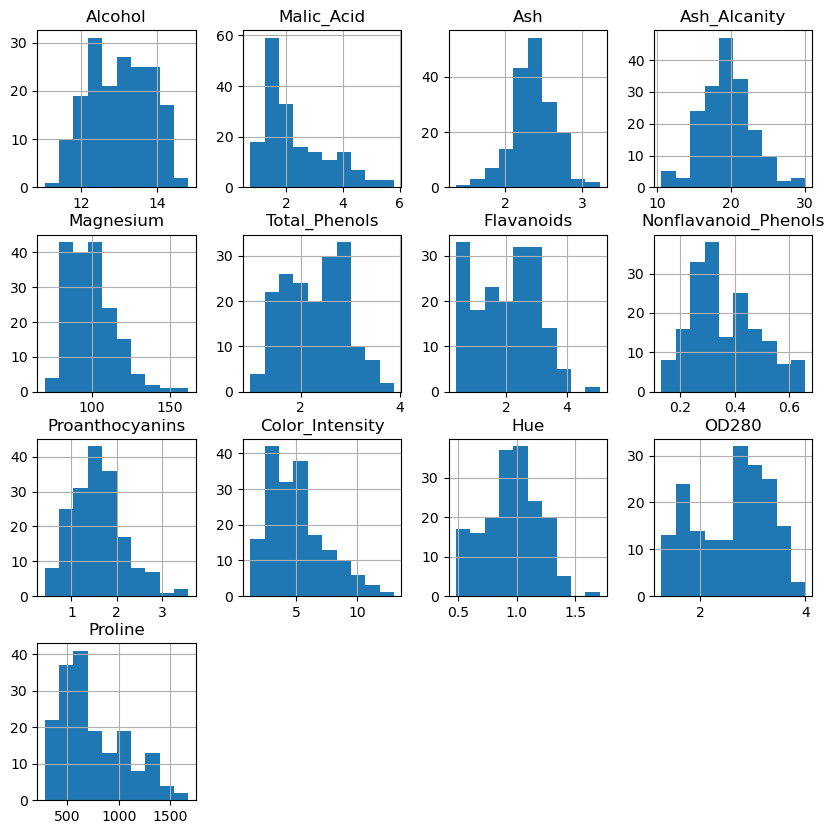

In [5]:
df.hist(figsize =(10 ,10));

# K-Means

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans

KMeans()

In [7]:
?kmeans

Type:        KMeans
String form: KMeans()
File:        c:\users\karacik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial cen

In [8]:
k_fit = kmeans.fit(df)

In [9]:
k_fit.n_clusters

8

In [10]:
k_fit.cluster_centers_

array([[1.25317647e+01, 2.28852941e+00, 2.31794118e+00, 2.07147059e+01,
        9.36176471e+01, 1.91294118e+00, 1.62294118e+00, 4.02647059e-01,
        1.35088235e+00, 4.66970585e+00, 9.12941176e-01, 2.33264706e+00,
        4.83647059e+02],
       [1.37512500e+01, 1.96916667e+00, 2.34875000e+00, 1.69750000e+01,
        1.05041667e+02, 2.79458333e+00, 2.92166667e+00, 2.72500000e-01,
        1.89541667e+00, 5.16833333e+00, 1.05750000e+00, 3.18916667e+00,
        1.05770833e+03],
       [1.29973333e+01, 2.66200000e+00, 2.36400000e+00, 1.93300000e+01,
        1.02433333e+02, 2.10966667e+00, 1.57433333e+00, 4.02666667e-01,
        1.53900000e+00, 5.82466667e+00, 8.98666667e-01, 2.34600000e+00,
        7.10233333e+02],
       [1.41366667e+01, 1.83166667e+00, 2.41166667e+00, 1.62666667e+01,
        1.07666667e+02, 3.25500000e+00, 3.49333333e+00, 2.71666667e-01,
        2.21666667e+00, 7.23333333e+00, 1.11333333e+00, 3.02833333e+00,
        1.53033333e+03],
       [1.37623529e+01, 1.78058824e+

In [11]:
k_fit.labels_

array([1, 1, 4, 3, 2, 3, 4, 4, 1, 1, 3, 4, 4, 1, 3, 4, 4, 1, 3, 5, 2, 2,
       1, 1, 5, 5, 4, 4, 5, 1, 4, 3, 1, 4, 1, 5, 5, 1, 1, 2, 5, 1, 1, 2,
       5, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 4, 0, 2, 0, 6, 7, 7, 2,
       0, 0, 2, 2, 5, 7, 0, 1, 5, 0, 7, 0, 2, 0, 7, 2, 6, 0, 0, 0, 0, 6,
       2, 6, 0, 0, 0, 7, 7, 5, 6, 0, 2, 7, 2, 6, 0, 7, 2, 7, 0, 0, 7, 2,
       6, 7, 6, 0, 7, 7, 0, 7, 7, 6, 6, 0, 7, 7, 7, 7, 7, 0, 7, 6, 6, 0,
       6, 6, 6, 2, 2, 0, 6, 6, 6, 2, 0, 6, 5, 5, 7, 6, 6, 6, 0, 0, 0, 2,
       6, 2, 0, 5, 2, 6, 0, 2, 6, 2, 6, 0, 2, 2, 2, 6, 0, 0, 2, 2, 2, 5,
       5, 6])

In [12]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [13]:
clusters = k_fit.labels_

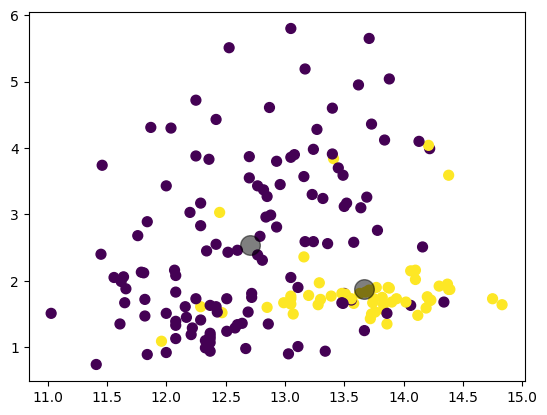

In [14]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
centers = k_fit.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5);


In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
!pip install --upgrade matplotlib
import mpl_toolkits

  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'c:\\users\\karacik\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [17]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_
centers = kmeans.cluster_centers_

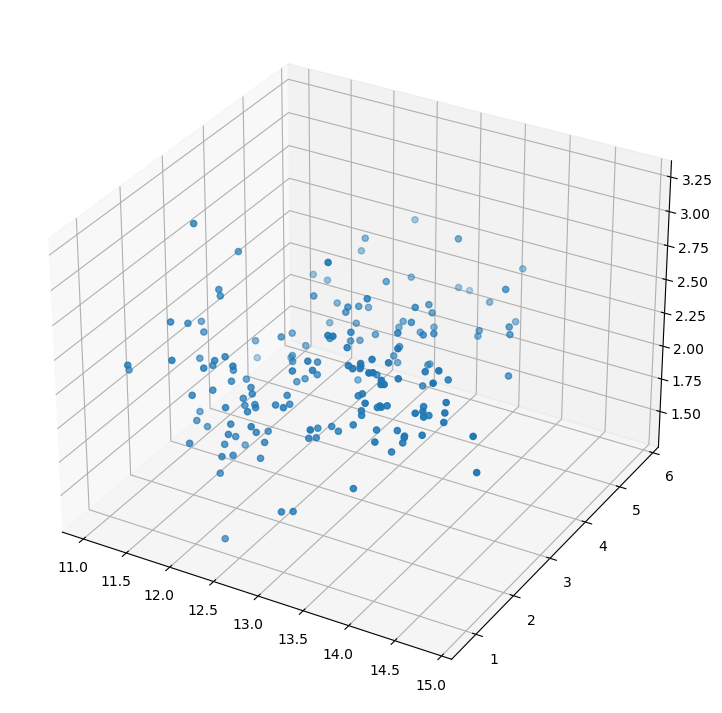

In [18]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])
plt.show()

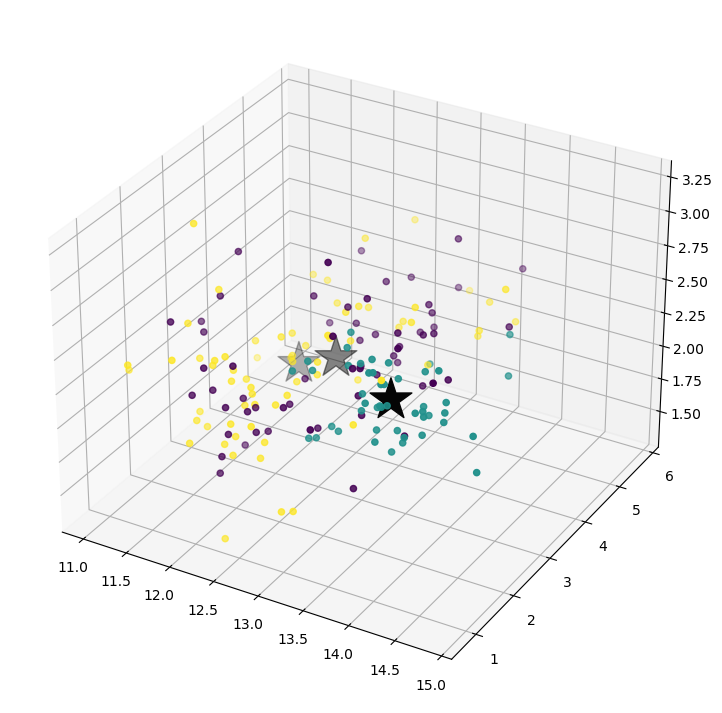

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=clusters)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [20]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [21]:
df["Cluster No"] = clusters

In [22]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster No
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


## Optimum Number of Clusters

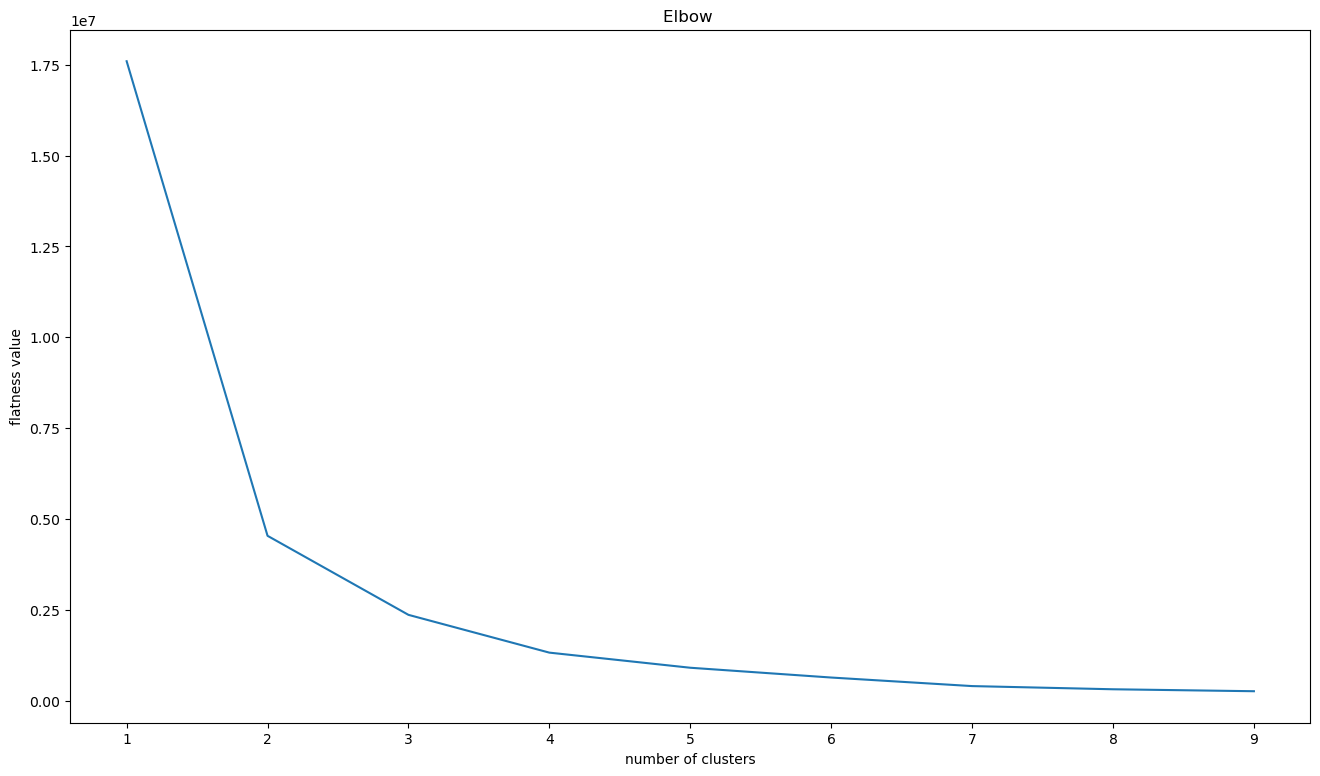

In [23]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('Elbow ')
plt.xlabel('number of clusters')
plt.ylabel('flatness value')
plt.show()

# Hierarchical Clustering

In [25]:
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium
Alcohol,,,,
14.23,1.71,2.43,15.6,127
13.20,1.78,2.14,11.2,100
13.16,2.36,2.67,18.6,101
14.37,1.95,2.50,16.8,113
13.24,2.59,2.87,21.0,118


In [26]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df , "complete")
hc_average = linkage(df , "average")
hc_single = linkage(df , "single")

In [27]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

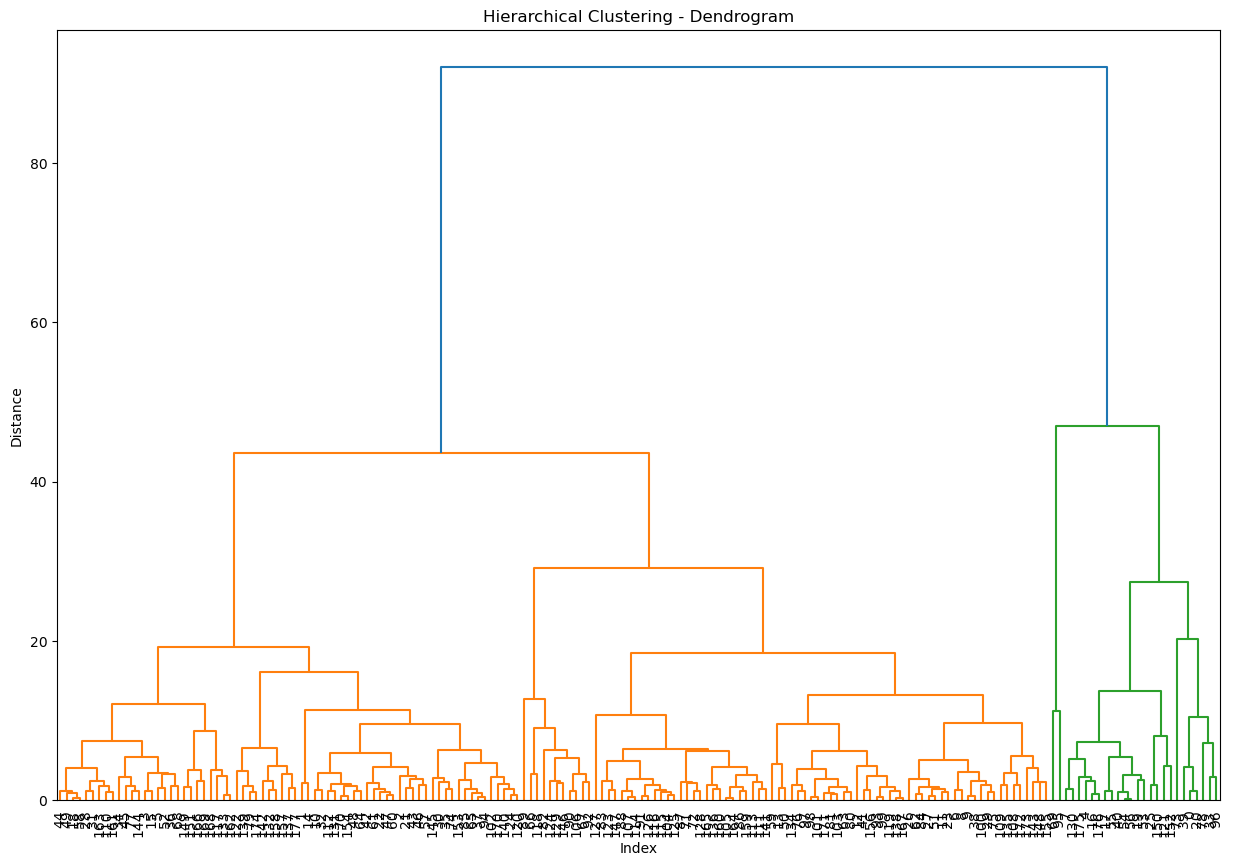

In [31]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15,10))
plt.title("Hierarchical Clustering - Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
dendrogram(hc_complete , leaf_font_size = 10);

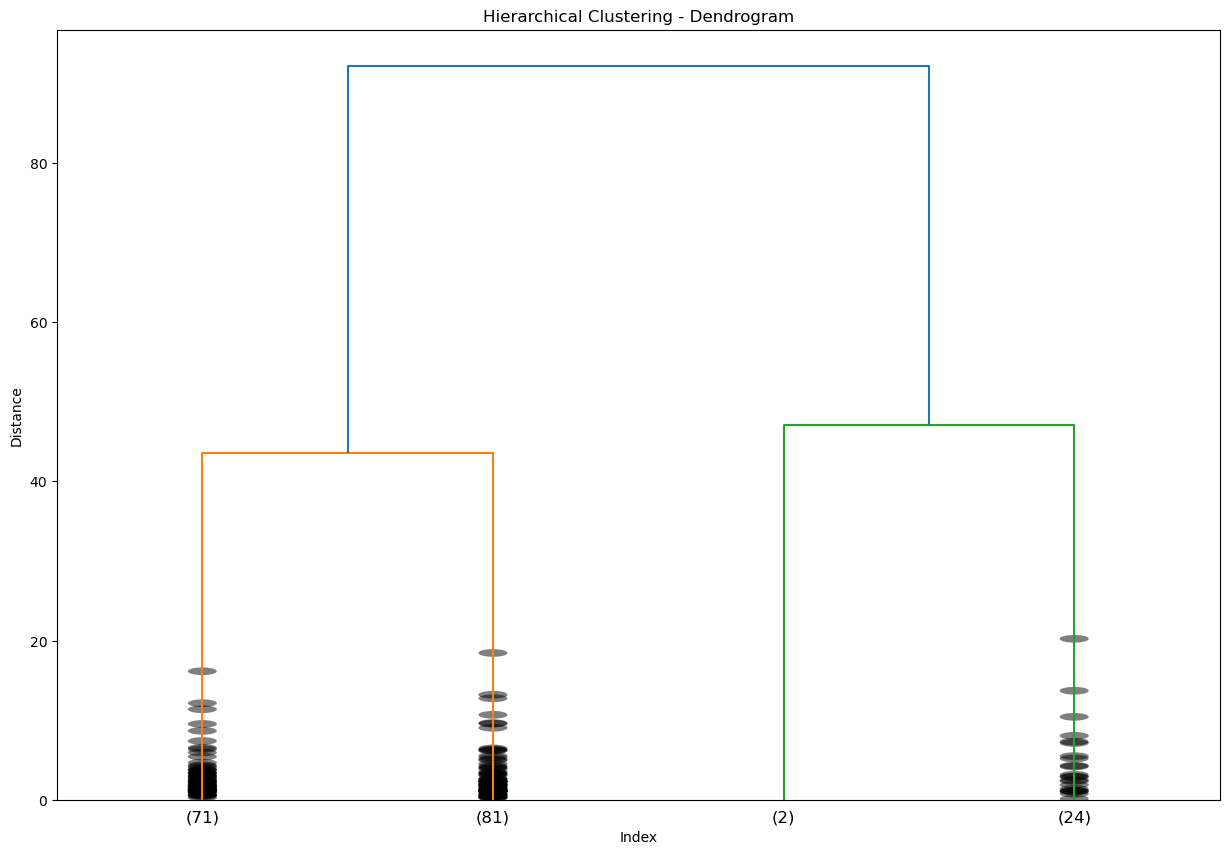

In [32]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15,10))
plt.title("Hierarchical Clustering - Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
dendrogram(hc_complete , truncate_mode = "lastp" , p = 4 , show_contracted = True);

## Optimum Number of Clusters

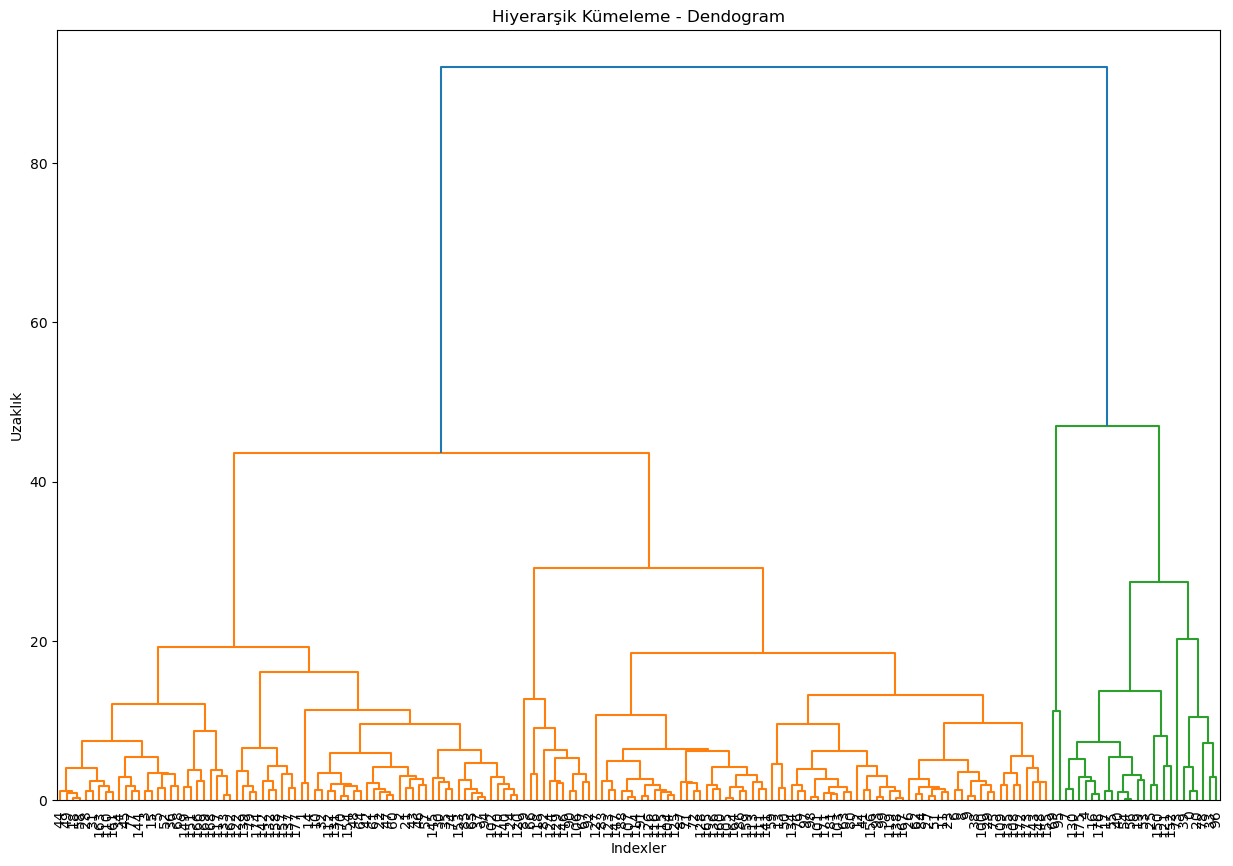

In [33]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(hc_complete, leaf_font_size=10);

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([1, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 2, 2, 0, 3, 3, 3, 0, 3, 1, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 0, 1, 3, 2, 0, 0,
       0, 3, 0, 0, 0, 0, 2, 0, 3, 3, 3, 3, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 2, 3, 1, 0, 2, 2, 1, 0, 0, 2, 3, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2, 2, 0, 3, 3, 3, 3, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 3, 2, 0, 3, 0, 2, 0, 0, 0, 3,
       3, 0], dtype=int64)

In [35]:
df["Clusters"] = cluster.fit_predict(df)

In [36]:
df.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Clusters
Alcohol,,,,,
14.23,1.71,2.43,15.6,127,1
13.20,1.78,2.14,11.2,100,0
13.16,2.36,2.67,18.6,101,0
14.37,1.95,2.50,16.8,113,3
13.24,2.59,2.87,21.0,118,3


# PCA

In [37]:
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]

In [38]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 0.23205254, -1.16959318,  1.91390522, -0.19827209],
       [-0.82799632, -2.49084714,  0.01814502, -1.03856807],
       [ 1.10933436, -0.2687382 ,  0.08835836, -1.03856807],
       [ 0.4879264 , -0.80925118,  0.93091845,  1.48231988],
       [ 1.84040254,  0.45194578,  1.28198515,  1.48231988]])

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [41]:
df_ = pd.DataFrame(data = pca_fit, columns = ["first","second","third"])

In [42]:
df_.head()

,first,second,third
0,0.043708,2.258912,-0.139390
1,-2.257867,1.308139,-0.692511
2,0.476020,0.331679,-1.207708
3,0.421433,1.204859,1.424299
4,2.253104,0.931977,1.087336


In [43]:
pca = PCA().fit(df)

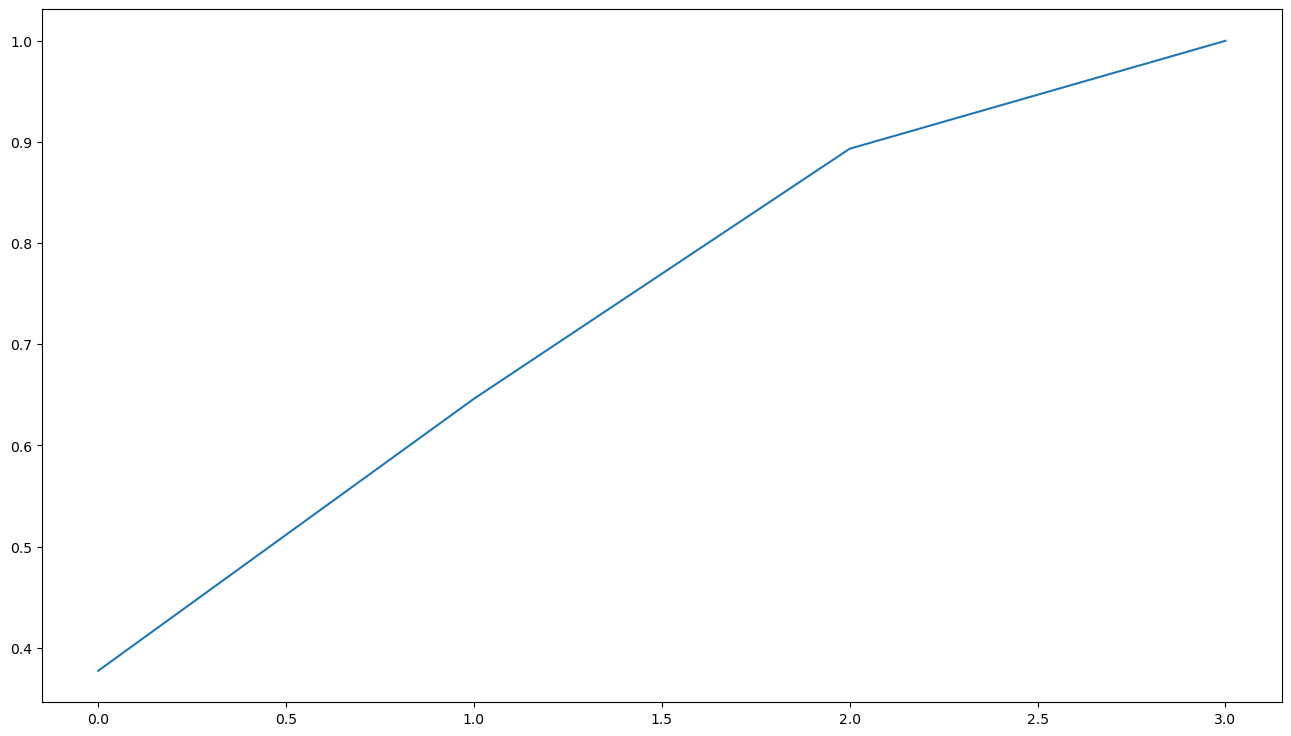

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));